In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/drive/MyDrive/task 2.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [9]:
# Datatypes of every columns
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
# Columns
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Categorical Columns
Survived

PClass

Sex

SibSp

Parch

Embarked

# Numerical Columns
Age

Fare

PassengerId

# Mixed Columns
Name

Ticket

Cabin

In [12]:
# check duplicate values
data.duplicated().sum()

0

In [13]:
# Check null values
pd.DataFrame({'count': data.shape[0],
              'nulls': data.isnull().sum(),
              'nulls%': data.isnull().mean() * 100,
              'cardinality': data.nunique(),
              "Datatypes" : data.dtypes
             })

,count,nulls,nulls%,cardinality,Datatypes
PassengerId,891,0,0.000000,891,int64
Survived,891,0,0.000000,2,int64
Pclass,891,0,0.000000,3,int64
Name,891,0,0.000000,891,object
Sex,891,0,0.000000,2,object
Age,891,177,19.865320,88,float64
SibSp,891,0,0.000000,7,int64
Parch,891,0,0.000000,7,int64
Ticket,891,0,0.000000,681,object
Fare,891,0,0.000000,248,float64


# Observations

Age has 177 missing values (19.86%)

Cabin has 687 missing values (77.10%), will have to drop

Embarked has 2 missing values (0.22%)

Few columns have inappropriate data types

In [14]:
# Dropping cabin column
data.drop(columns=['Cabin'],inplace=True)

In [15]:
# Imputing missing values for age
# Strategy - mean
data["Age"] = data['Age'].fillna(data['Age'].mean())

In [16]:
# Imputing missing values for embarked column
print(f"most frequent value in Embarked : {data['Embarked'].mode()[0]}")
# print("-"*50)
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode()[0])

most frequent value in Embarked : S


In [17]:
data.isnull().sum().sum()

0

In [18]:
# Change the SibSp and Parch to categories

print(data['SibSp'].value_counts())
print("-"*50)
print("-"*50)
print(data['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
--------------------------------------------------
--------------------------------------------------
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


# Changing data type for the following cols
Survived(category)

PClass(category)

Sex(category)

Age(int)

Embarked(category)

In [19]:
data['Survived']=data['Survived'].astype('category')
data['Pclass']=data['Pclass'].astype('category')
data['Sex']=data['Sex'].astype('category')
data['Age']=data['Age'].astype('int')
data['Embarked']=data['Embarked'].astype('category')

In [20]:
data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age               int64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked       category
dtype: object

Univariate Analysis

0    549
1    342
Name: Survived, dtype: int64
--------------------------------------------------
Percentage of people died : 61.61616161616161


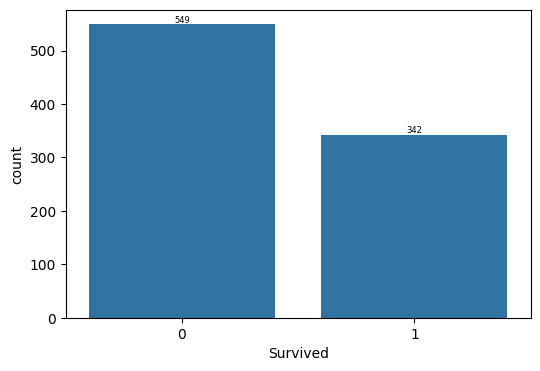

In [22]:
# Survived column

print(data['Survived'].value_counts())
print("-"*50)
print(f"Percentage of people died : {(data['Survived'].value_counts().values[0]/891)*100}")
plt.figure(figsize = (6,4))
a= sns.countplot(x = data['Survived'] )
a.bar_label(a.containers[0], fontsize=6);

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64
--------------------------------------------------


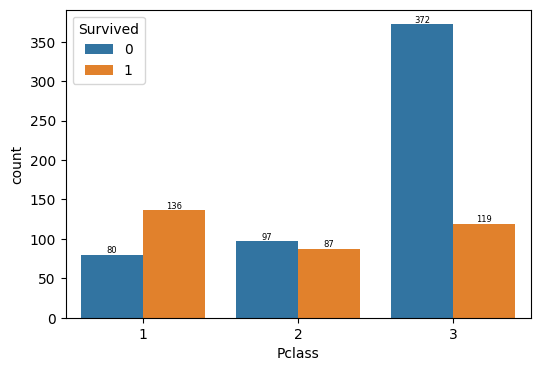

In [23]:
# Pclass column

print((data['Pclass'].value_counts()/891)*100)
print("-"*50)
plt.figure(figsize = (6,4))
a= sns.countplot(x = data['Pclass'] , hue = data['Survived'])
a.bar_label(a.containers[0], fontsize=6)
a.bar_label(a.containers[1], fontsize=6);

# Conclusion
Pclass 3 was the most crowded class

Most people died was from 3 class

male      64.758698
female    35.241302
Name: Sex, dtype: float64
--------------------------------------------------


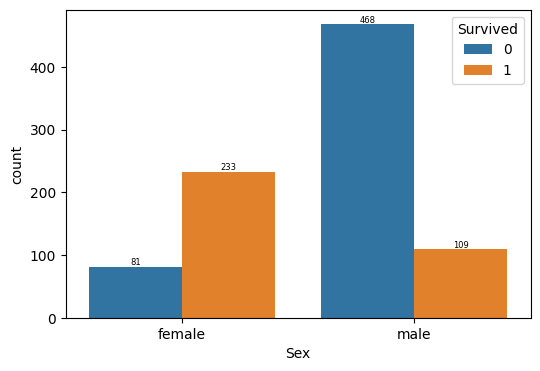

In [24]:
# Sex column

print((data['Sex'].value_counts()/891)*100)
print("-"*50)
plt.figure(figsize = (6,4))
a= sns.countplot(x = data['Sex'] , hue = data['Survived'])
a.bar_label(a.containers[0], fontsize=6)
a.bar_label(a.containers[1], fontsize=6);

# Conclusion
Number of men died is greater than women

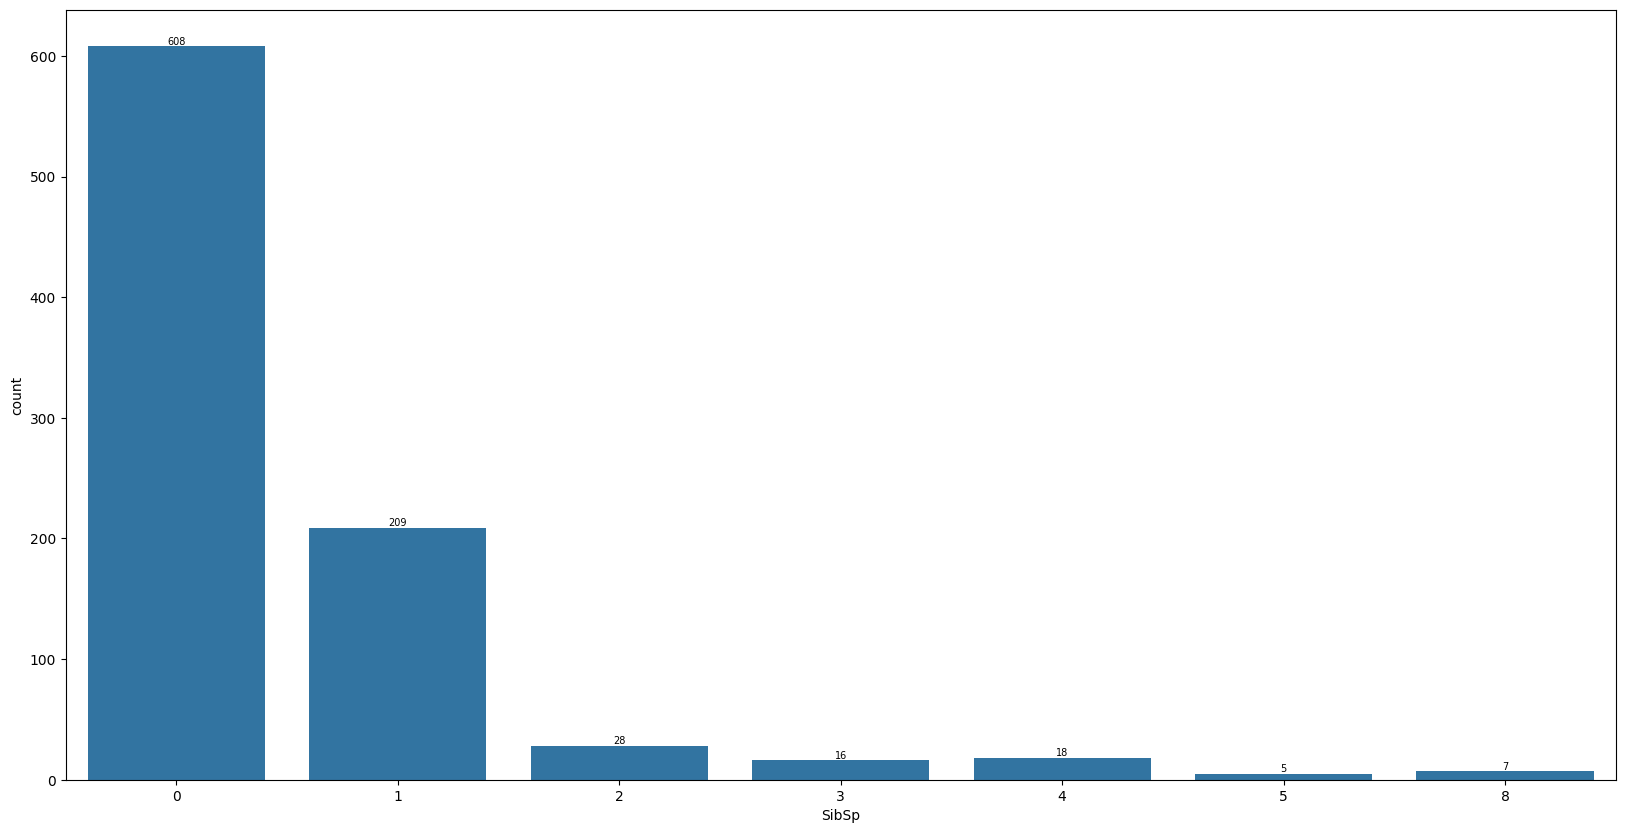

In [25]:
# SibSp column

a= sns.countplot(x = data['SibSp'])
a.bar_label(a.containers[0], fontsize=7);

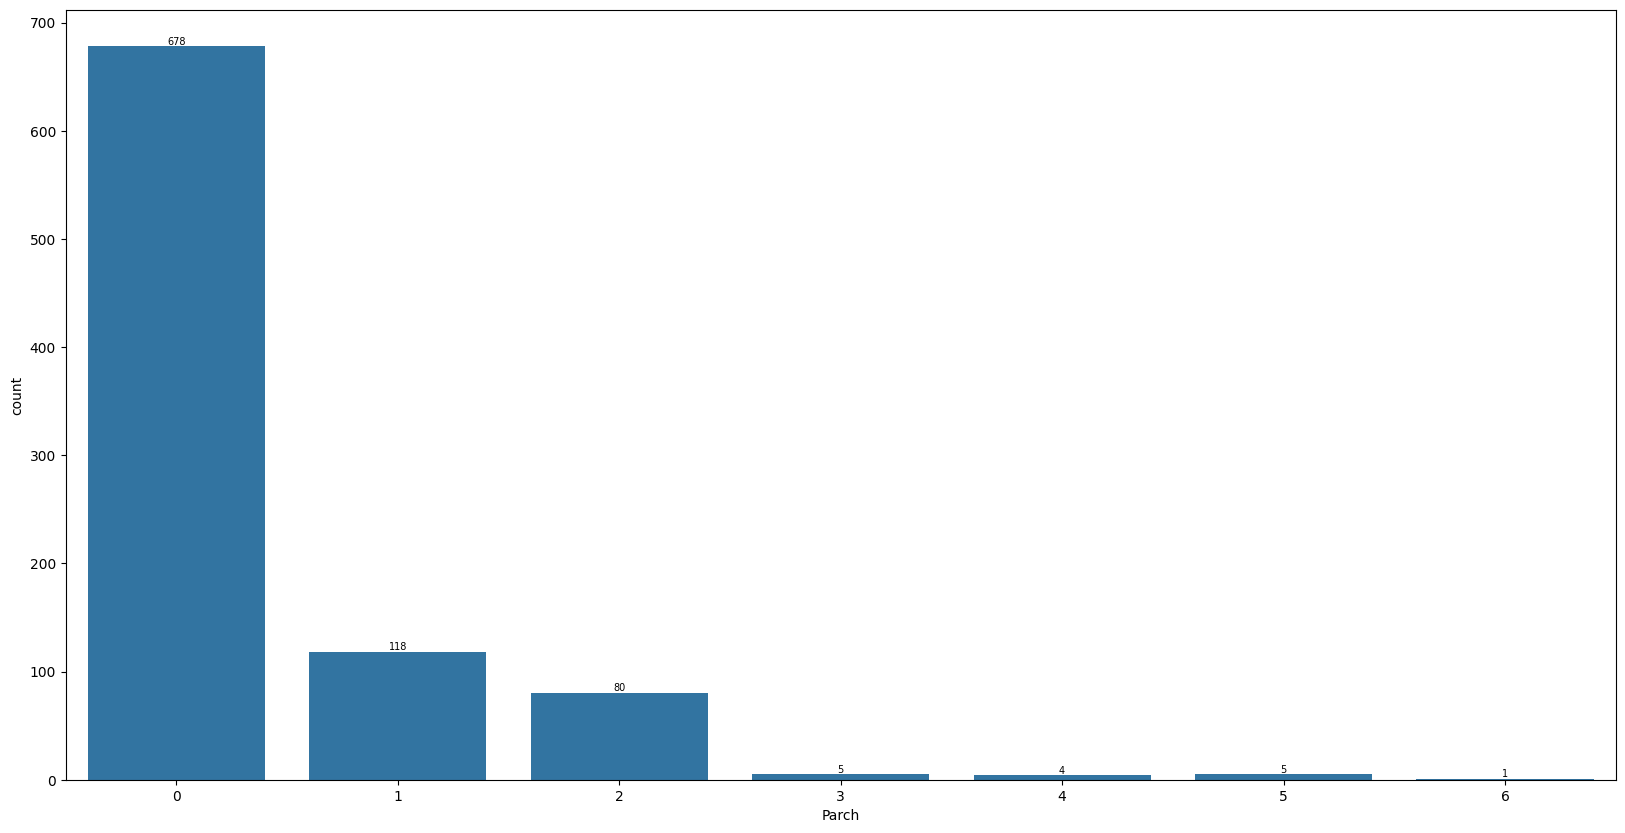

In [26]:
# Parch column

a= sns.countplot(x = data['Parch'])
a.bar_label(a.containers[0], fontsize=7);

S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64
--------------------------------------------------


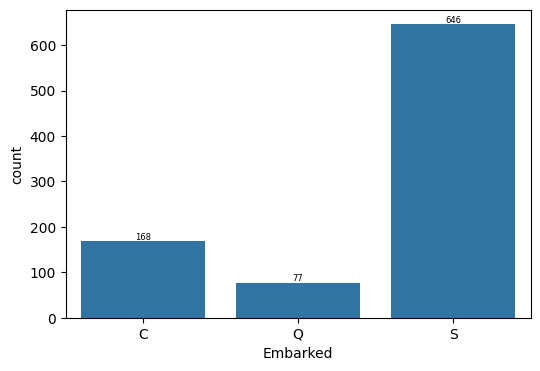

In [27]:
# Embarked column

print((data['Embarked'].value_counts()/891)*100)
print("-"*50)
plt.figure(figsize = (6,4))
a= sns.countplot(x = data['Embarked'] )
a.bar_label(a.containers[0], fontsize=6);

0.45956263424701577
0.9865867453652877


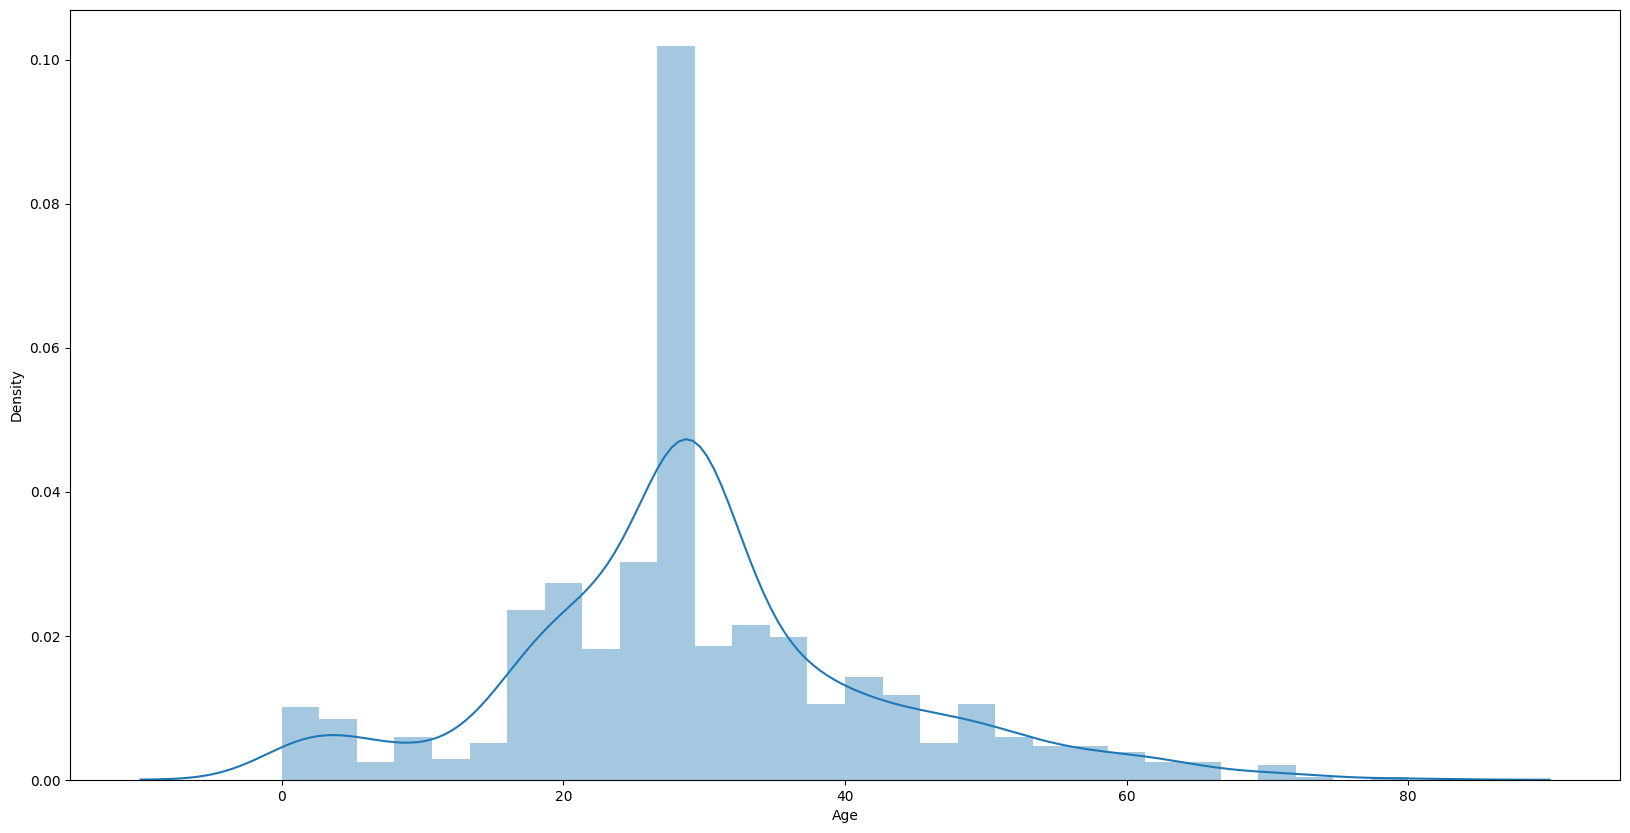

In [28]:
# Age column

sns.distplot(data['Age'])

print(data['Age'].skew())
print(data['Age'].kurt())

<Axes: xlabel='Fare', ylabel='Density'>

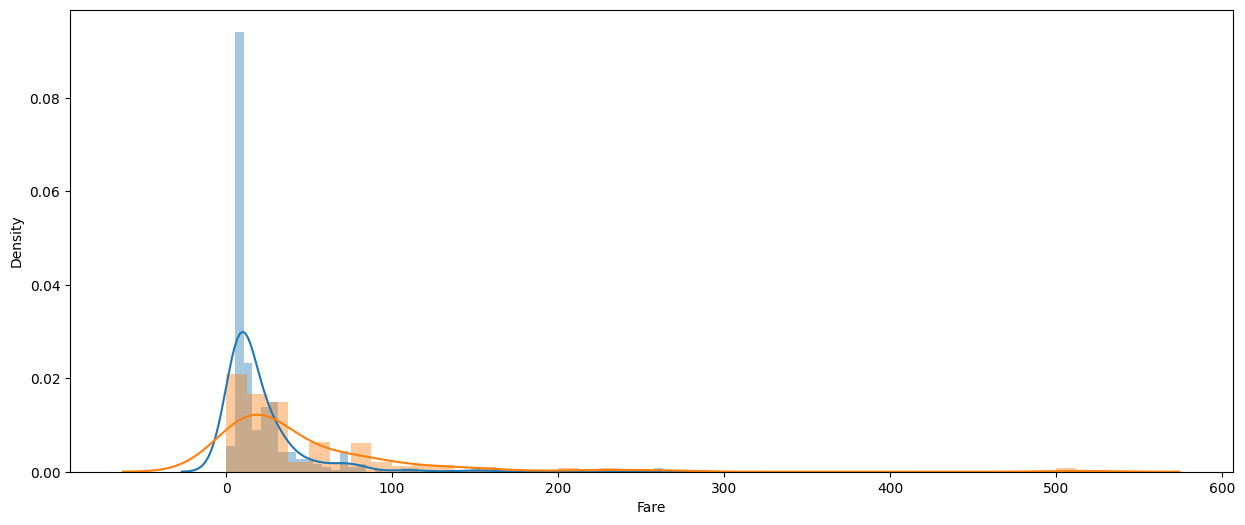

In [32]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Fare'])
sns.distplot(data[data['Survived']==1]['Fare'])

<Axes: xlabel='Age', ylabel='Density'>

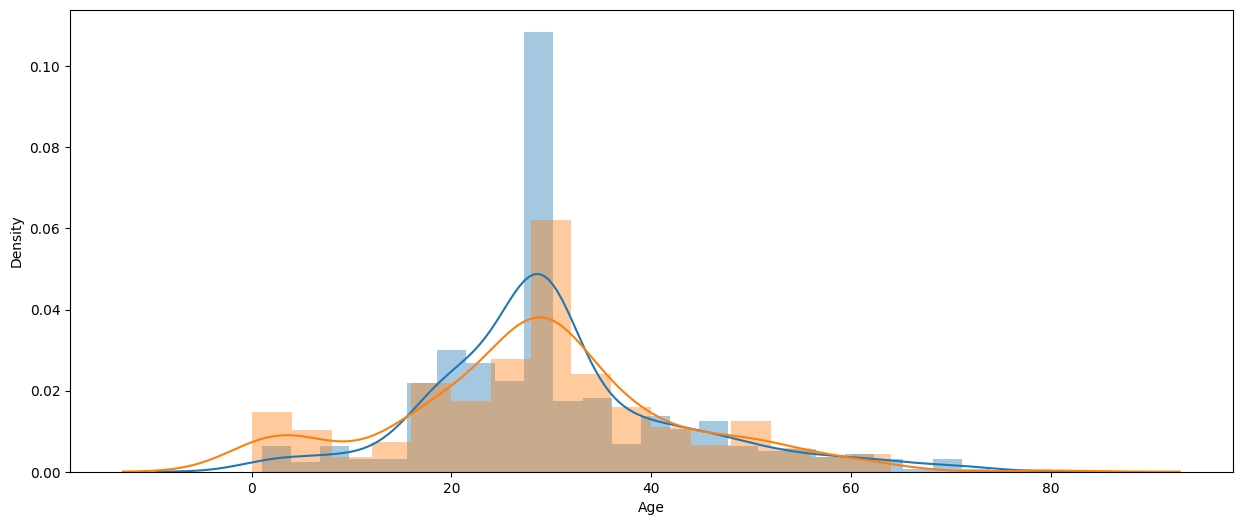

In [33]:
plt.figure(figsize=(15,6))
sns.distplot(data[data['Survived']==0]['Age'])
sns.distplot(data[data['Survived']==1]['Age'])

In [29]:
print("People with age in between 60 and 70 are",data[(data['Age']>60) & (data['Age']<70)].shape[0])
print("People with age greater than 70 and 75 are",data[(data['Age']>=70) & (data['Age']<=75)].shape[0])
print("People with age greater than 75 are",data[data['Age']>75].shape[0])

People with age in between 60 and 70 are 15
People with age greater than 70 and 75 are 6
People with age greater than 75 are 1


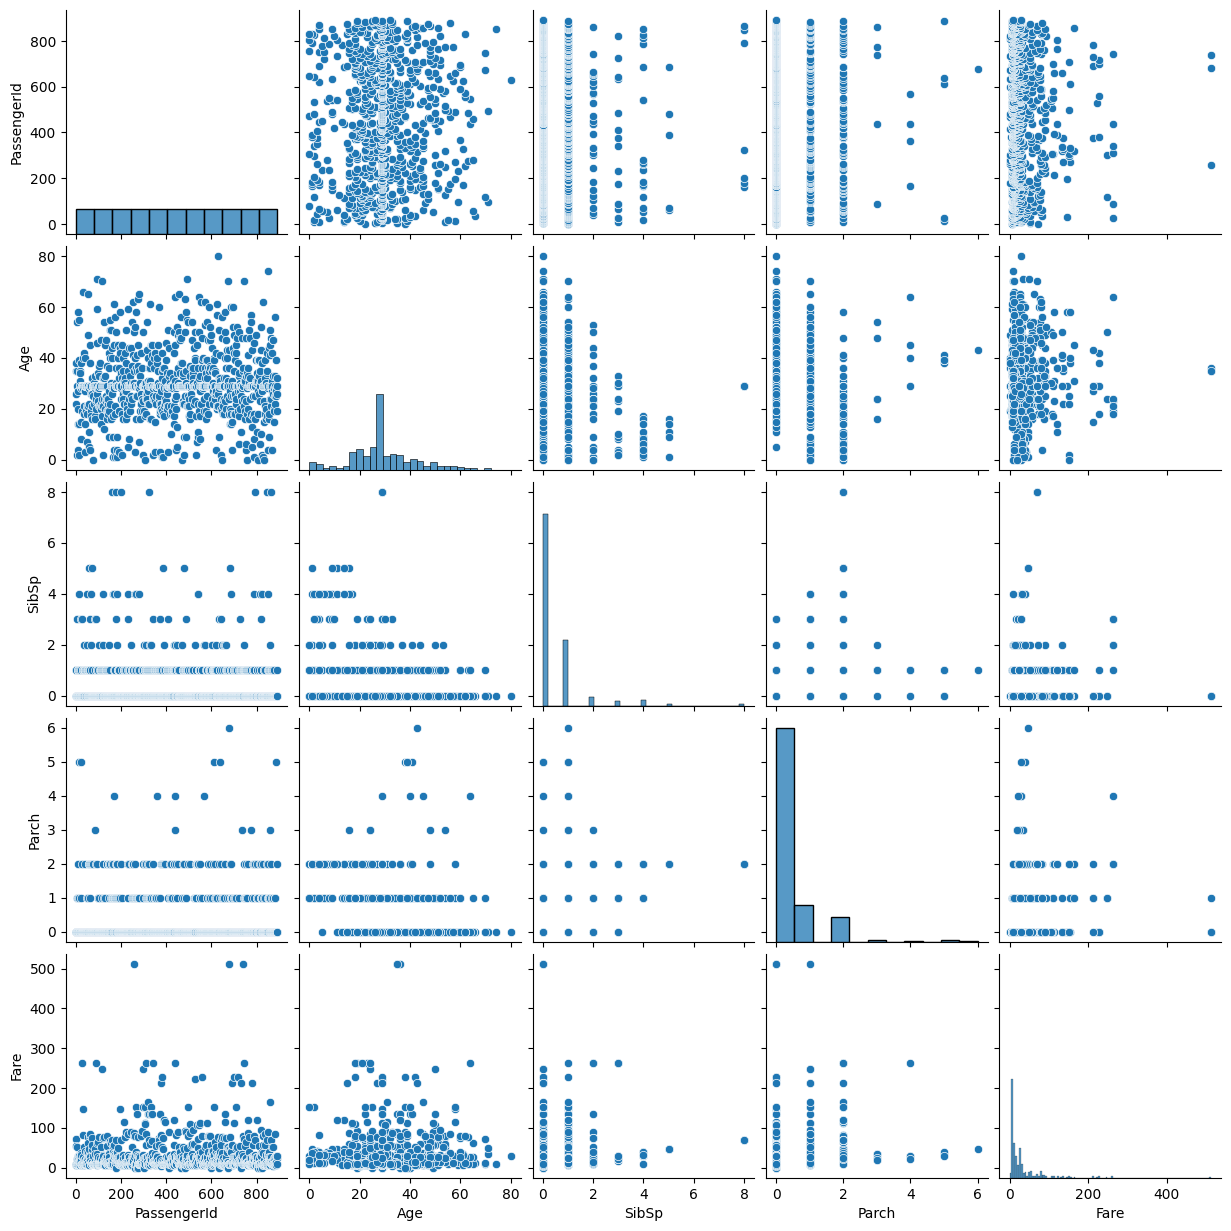

In [30]:
sns.pairplot(data)

<Axes: >

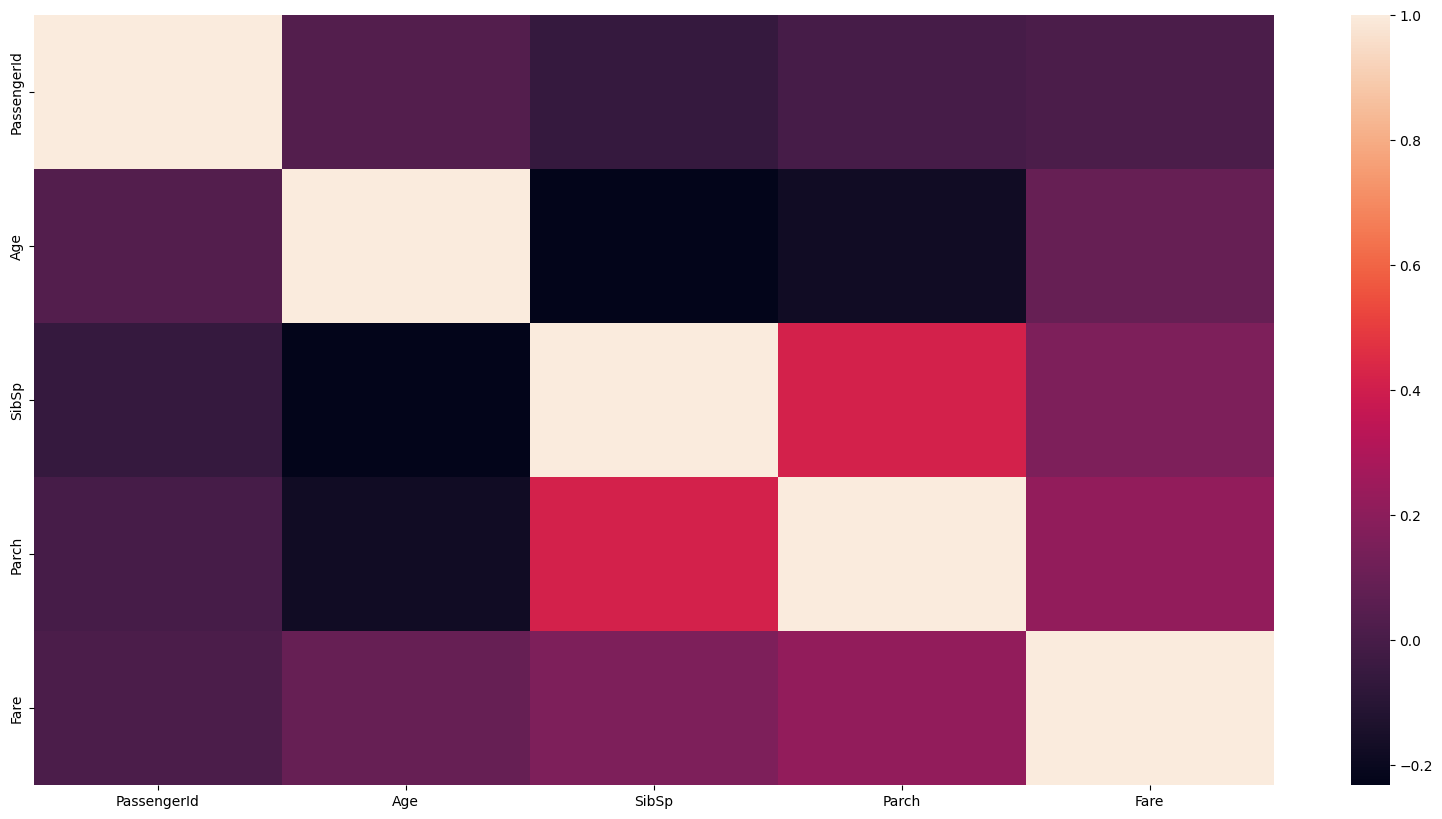

In [31]:
# Heatmap
sns.heatmap(data.corr())